In [27]:
import numpy as np
from sparse_shift.utils import dag2cpdag, cpdag2dags
import matplotlib.pyplot as plt
from sparse_shift.plotting import plot_dag
import pandas as pd

# Paper figure

In [28]:
dag = np.zeros((11, 11))
dag[2, np.asarray([3, 4])] = 1
dag[4, 3] = 1
dag[8, np.asarray([10, 7, 0, 1, 9])] = 1
dag[7, np.asarray([0, 1, 5, 6, 9, 10])] = 1
dag[0, 1] = 1
dag[1, 5] = 1
dag[5, 6] = 1

true_dag = dag

## Compute pvalues

In [67]:
# Shape: (graphs, variables, envs, envs)
pvalues = np.load('./results_paper/cytometry_mch_kci_pvalues_env=9.npy')

In [30]:
pvalues.shape

(336, 11, 9, 9)

In [31]:
alpha = 0.05 / pvalues.shape[1]
n_changes = np.sum(pvalues <= alpha, axis=(1, 2, 3)) / 2

## Find MEC true DAG and min changes DAG

In [32]:
true_cpdag = dag2cpdag(true_dag)
dags = cpdag2dags(true_cpdag)

In [33]:
np.where((dags == true_dag).all(axis=(1,2)))[0]

array([181])

In [34]:
np.where(n_changes == np.min(n_changes))[0]

array([43])

In [35]:
n_changes[43]

321.0

## Plot min changes DAG

In [36]:
# Obtain labels
df1 = pd.read_csv('../../data/cytometry/dataset_1.csv')
labels = [l.split('.')[1] for l in df1.columns]

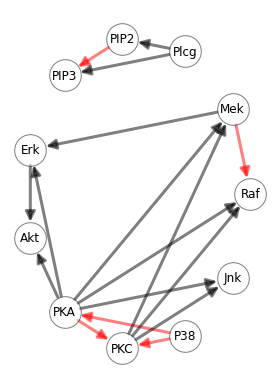

In [66]:
idx = np.argmin(n_changes)
dag = dags[idx]
plot_dag(
    dag,
    highlight_edges=dag-true_dag,
    labels=labels,
    node_size=1000,
    figsize=(4, 5.5),
)
plt.tight_layout()
plt.savefig('./figures/learned_dag.pdf')